# GitHub Insights

In this notebook, I'll explore the information retrieved about my GitHub repositories and commits.

## Import libraries and data

I'll import the necessary libraries as I'll use the **seaborn** library to plot the insights.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
repos = pd.read_csv('repos_info.csv')
commits = pd.read_csv('commits_info.csv')

## Basic Analysis

Let's begin by exploring the repos and commit datasets. Then, I'll check the repos on the basis of forks, stars and watchers. Finally, I'll check the commit messages.

In [5]:
print("Total repos till date: {}".format(repos.shape[0]))
print("Total commits till date: {}".format(commits.shape[0]))

Total repos till date: 22
Total commits till date: 162


In [6]:
repos.describe()

,Id,Forks count,Issues count,Stars count,Watchers count
count,2.200000e+01,22.0,22.000000,22.000000,22.000000
mean,6.418052e+08,0.0,0.136364,0.090909,0.090909
std,1.373539e+08,0.0,0.639602,0.294245,0.294245
min,2.625028e+08,0.0,0.000000,0.000000,0.000000
25%,6.295003e+08,0.0,0.000000,0.000000,0.000000
50%,6.800275e+08,0.0,0.000000,0.000000,0.000000
75%,7.410058e+08,0.0,0.000000,0.000000,0.000000
max,7.468347e+08,0.0,3.000000,1.000000,1.000000


From above, I infered the following:
1. I've had 0 forks.
2. The number of watchers and stars go hand in hand.
3. I've had no issues reported in any repository.

In [7]:
print("Two most common commit messages: {}".format(' and '.join(commits['Message'].value_counts().index[:2])))

Two most common commit messages: Update README.md and Initial commit


It appears that sometimes I do tend to update readme files on GitHub itself and use its default message as the commit message.

## Commits per repository

I'll begin by checking how many commits I've done in each repository.

In [8]:
commits_count = pd.DataFrame(pd.merge(repos, 
         commits, 
         left_on='Id', 
         right_on='Repo Id', 
         how = 'left').groupby('Id').size().reset_index())
commits_count.columns = ['Id', 'Commits count']

Next, I'll combine the repos dataset with the commits count to help visualize them.

In [9]:
repos = pd.merge(repos, commits_count, on = 'Id')

Text(0.5, 1.0, 'Commits per repository')

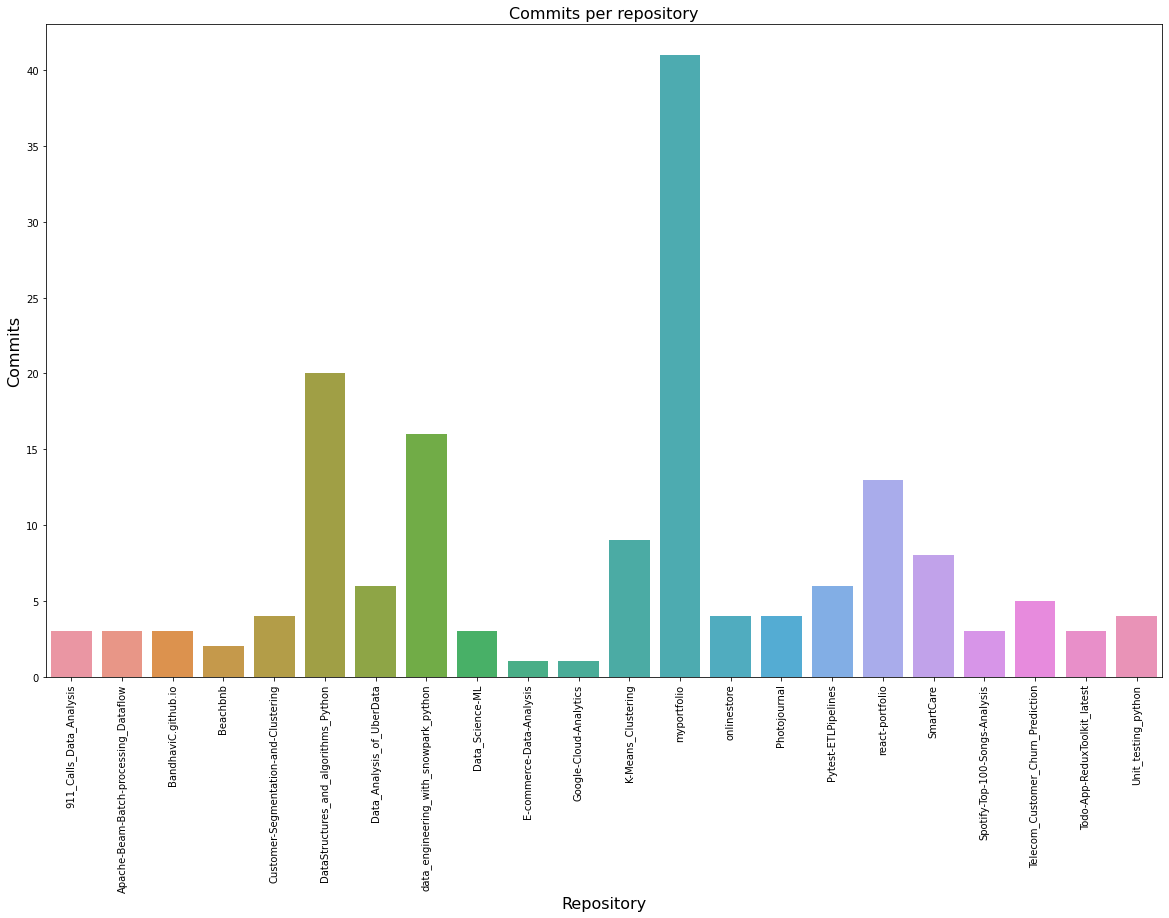

In [43]:
import warnings

# Ignore seaborn warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

plt.figure(figsize = (20, 12))
sns.barplot(x=repos['Name'], y=repos['Commits count'])
plt.xticks(rotation = 90)
plt.xlabel("Repository", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits per repository", fontsize = 16)

I've had the maximum commits in **myportfolio**, which is a webpage for my portfolio. The second most committed repository is the **Data Structures and Algorithms_Python** which explains the data structures in python.

## Yearly analysis

I'll analyse my yearly stats. I expect to see the maximum commits in the years 2018 and 2019 as I really started working on my own personal projects this time.

In [11]:
commits['Year'] = commits['Date'].apply(lambda x: x.split('-')[0])
yearly_stats = commits.groupby('Year').count()['Commit Id']

Text(0.5, 1.0, 'Commits in each year')

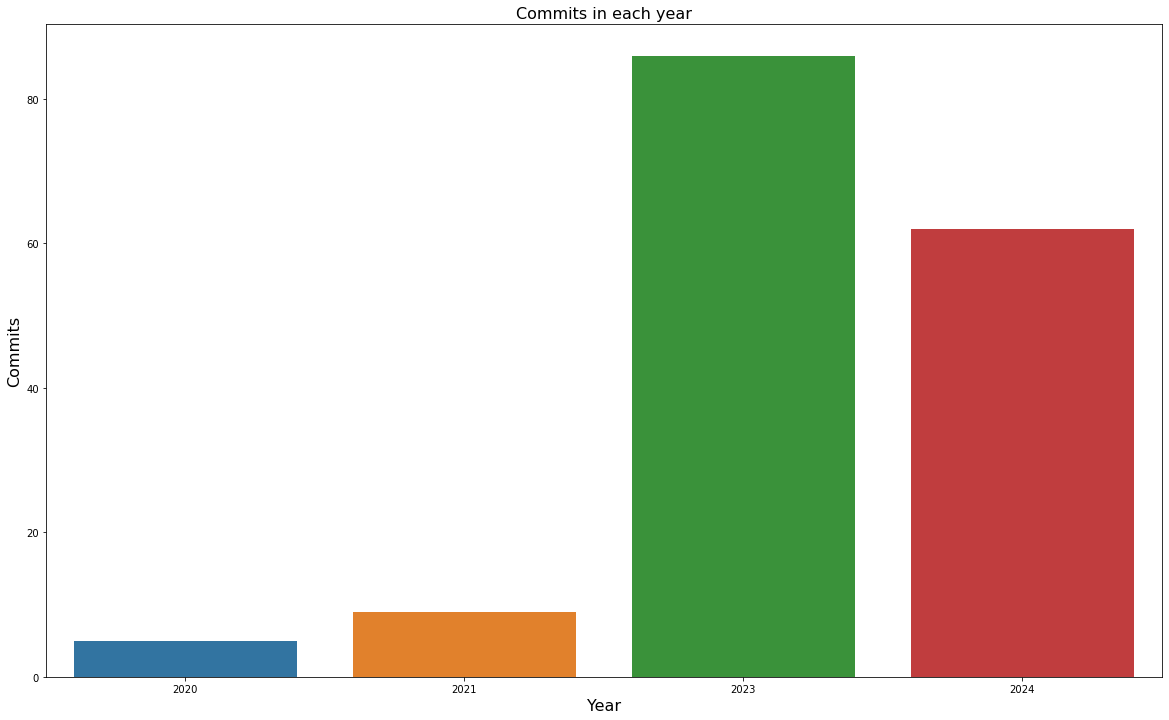

In [49]:
plt.figure(figsize = (20, 12))
sns.barplot(x=yearly_stats.index, y=yearly_stats.values)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in each year", fontsize = 16)

It appers that I've had the maximum number of commits in the **Year 2023**.

## Monthly commits in 2023

As I observed that the maximum commmits occured in 2023, I'll see their distribution in each month.

In [26]:
commits['Month'] = commits['Date'].apply(lambda x: x.split('-')[1])
monthly_stats = commits[commits['Year'] == '2023'].groupby('Month').count()['Commit Id']

Text(0.5, 1.0, 'Commits in each month of 2023')

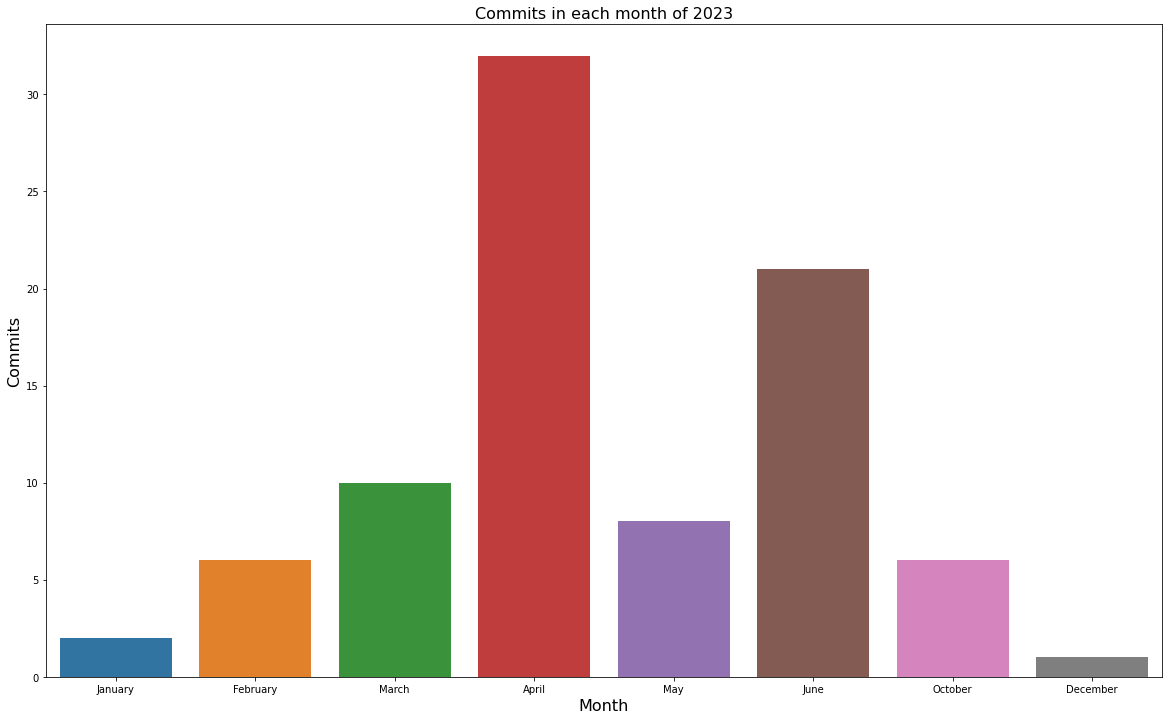

In [39]:
month_mapper = { '01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December'}
labels = []
for value in monthly_stats.index:
    labels.append(month_mapper[value])

plt.figure(figsize = (20, 12))
plot = sns.barplot(x=monthly_stats.index, y=monthly_stats.values)
plt.xlabel("Month", fontsize = 16)
plot.set_xticklabels(labels)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in each month of 2023", fontsize = 16)

I've had the **maximum commits** during the month of **April** and **minimum commits** during the month of **December**.

## Everyday commits in April 2023

I'd also like to check the number of commits I've done across each day of 2023.

In [44]:
commits['Date only'] = pd.to_datetime(commits['Date'].apply(lambda date: date.split('T')[0]))
commit_stats = commits[(commits['Year'] == '2023')
                       & (commits['Month'] == '04')]['Date only'].value_counts().sort_index()

Text(0.5, 1.0, 'Commits in April 2023')

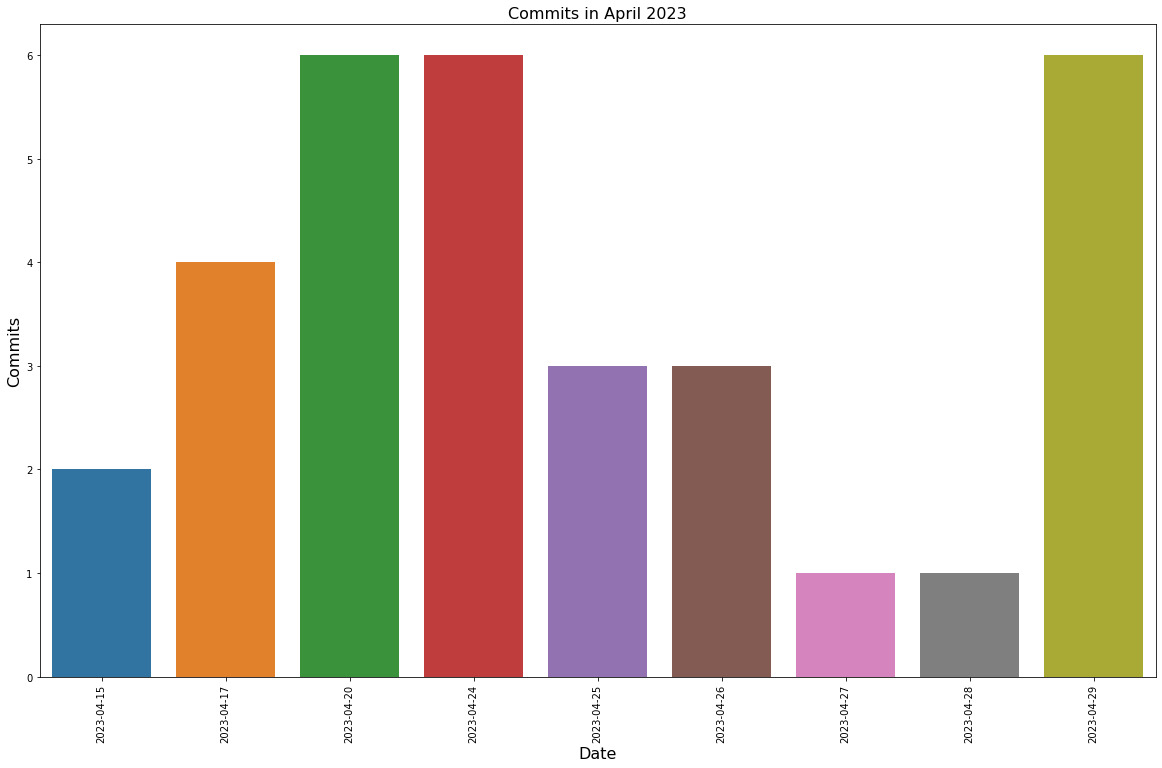

In [46]:
labels = []
for value in commit_stats.index:
    labels.append(value.date())
    
plt.figure(figsize = (20, 12))
plot = sns.barplot(x=commit_stats.index, y=commit_stats.values)
plt.xlabel("Date", fontsize = 16)
plt.xticks(rotation = 90)
plot.set_xticklabels(labels)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in April 2023", fontsize = 16)

I made maximum equal number of commits on the **20th, 24th, and 29th of April 2023**.

## Most popular languages

Next, I'll explore languages that I've used in each repository.

In [35]:
list_of_languages = []
for languages in repos['Languages']:
    if type(languages) == str:
        for language in languages.split(','):
            list_of_languages.append(language.strip())

Text(0.5, 1.0, 'Language distribution amongst all repositories')

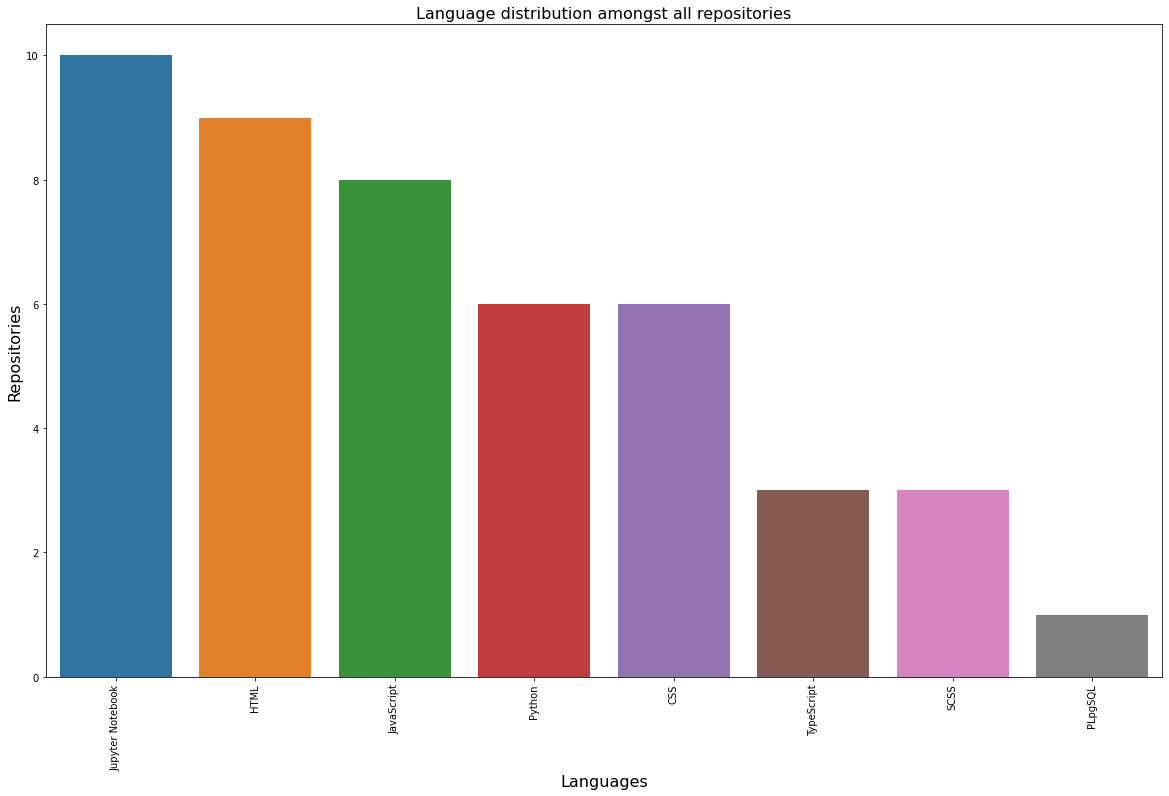

In [48]:
languages_count = pd.Series(list_of_languages).value_counts()

plt.figure(figsize = (20, 12))
sns.barplot(x=languages_count.index, y=languages_count.values)
plt.xlabel("Languages", fontsize = 16)
plt.xticks(rotation = 90)
plt.ylabel("Repositories", fontsize = 16)
plt.title("Language distribution amongst all repositories", fontsize = 16)

I've worked on a variety of languages inclduing **HTML**, **JavaScript** and others. However, the most is **Jupyter Notebook** which is mainly working with **Python** in my case.